# W Plot example

We demostrate an use of the validphys API directly in Python without going through the reportengine loop.

We produce a scatter plot of the predictions for $W^+$ vs $W^-$ cross sections for each replica in NNPDF 3.0 and 3.1, and compare the result with the experimental error.

In [1]:
from validphys.loader import Loader
from validphys.core import DataSetSpec, PDF, PDFSETS
from validphys.results import one_or_more_results

In [2]:
l = Loader()
thno = 53
dsname = 'ATLASWZTOT13TEV81PB'
cfactors = ['NRM', 'QCD']

ds = l.check_dataset(name=dsname, theoryid=thno, cfac=cfactors, cuts='nocuts')

In [3]:
nn30 = PDFSETS.NNPDF30_nnlo_as_0118

In [4]:
nn31 = PDFSETS.NNPDF31_nnlo_as_0118

In [5]:
resd, res30, res31 = one_or_more_results(ds, [nn30, nn31])

In [6]:
import ruamel_yaml as yaml

In [7]:
from validphys.plotoptions import get_info

In [8]:
info = get_info(ds)

In [9]:
info.y_label

'$\\sigma^{fid}$ (fb)'

In [10]:

xlabel, ylabel, *_ = info.extra_labels[' ']
units = info.y_label

In [11]:
info.extra_labels

{' ': ['$W^-$', '$W^+$', 'Z'], 'boson': ['W', 'W', 'Z']}

In [12]:
units

'$\\sigma^{fid}$ (fb)'

In [13]:
import numpy as np
import numpy.linalg as la

In [14]:
cov = resd.covmat[:2,:2]
cov

array([[9.90e+09, 7.00e+09],
       [7.00e+09, 1.82e+10]])

In [15]:
vals, vects = la.eigh(cov)

In [16]:
vals = np.sqrt(vals)

In [17]:
cov

array([[9.90e+09, 7.00e+09],
       [7.00e+09, 1.82e+10]])

In [18]:
cv = resd.central_value[:2]

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [21]:
vects

array([[-0.86889896,  0.49498949],
       [ 0.49498949,  0.86889896]])

In [22]:
vals, vects = la.eigh(resd.covmat[:2,:2])

In [23]:
vals = np.sqrt(vals)

In [24]:
vals/1e6

array([0.07689135, 0.14895543])

In [25]:
res30.central_value

array([3440234. , 4520515. ,  743430.6], dtype=float32)

/home/zah/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


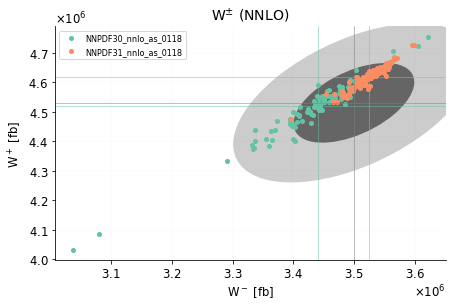

In [26]:
from validphys.app import app
from validphys import mplstyles

plt.style.use(str(mplstyles.smallstyle))

angle = np.arctan2(vects[0,1], vects[0,0])*180/np.pi



el1s = Ellipse(xy=cv, angle=angle, width=2*vals[0], height=2*vals[1], zorder=1)
el2s = Ellipse(xy=cv, angle=angle, width=4*vals[0], height=4*vals[1], zorder=1)

#fig = plt.figure(0)
#ax = fig.add_subplot(111, aspect='equal')

fig, ax = plt.subplots()

color30 = next(ax._get_lines.prop_cycler)['color']
color31 = next(ax._get_lines.prop_cycler)['color']

ax.plot(*res30._rawdata[:2,:], 'o', label=nn30.name, color=color30)
ax.plot(*res31._rawdata[:2,:], 'o', label=nn31.name, color=color31)

ax.axvline(res30.central_value[0], color=color30, linewidth=0.5)
ax.axhline(res30.central_value[1], color=color30,linewidth=0.5)

ax.axvline(res31.central_value[0], color=color31,linewidth=0.5)
ax.axhline(res31.central_value[1], color=color31,linewidth=0.5)

ax.axvline(resd.central_value[0], color='grey',linewidth=0.5)
ax.axhline(resd.central_value[1], color='grey',linewidth=0.5)


ax.add_artist(el1s)
ax.add_artist(el2s)

el1s.set_facecolor('black')
el1s.set_alpha(0.5)
el1s.set(label = "$1 \sigma$")

el2s.set_facecolor('black')
el2s.set_alpha(0.2)

ax.set_xlabel("%s [fb]"%xlabel)
ax.set_ylabel("%s [fb]"%ylabel)

ax.set_axisbelow(True)
ax.set_title("$W^{\pm}$ (NNLO)")
ax.legend()


In [27]:
fig.savefig("wabs.pdf")